<a href="https://colab.research.google.com/github/luciekash/WebApp/blob/master/Copy_of_Project_Notebook_Data_Cleaning_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Notebook: Data Cleaning Project

## 1. Introduction

Welcome to the Star Wars Survey project! 

In this project, you'll work to analyze data on the Star Wars movies. When you're finished, you'll have a notebook you can either add to your portfolio or expand on your own.

Google, StackOverflow, and the documentation for various packages will help you as you progress through this project. Data scientists make extensive use of resources like these as they write code.

Now, let's get started!

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

The following code reads the data into a pandas DataFrame:

```
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
```

We need to specify an encoding, because the dataset has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer [Joel Spolsky's blog](http://www.joelonsoftware.com/articles/Unicode.html).

The data has several columns, including the following:

* `RespondentID` — An anonymized ID for the respondent (person taking the survey)
* `Gender` — the respondent's gender
* `Age` — the respondent's age
* `Household Income` — the respondent's income
* `Education` — the respondent's education level
* `Location` (Census Region) — the respondent's location
* `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
* `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

**Tasks**

* Read the dataset into a DataFrame.
* Explore the data by entering `star_wars.head(10)`. Look for any strange values in the columns and rows.

* Review the column names with `star_wars.columns`.


In [2]:
# Your code goes here
# ---
#
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [12]:
#cleaning of data, since respondent value is unique it should be with Nan
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,4,3,6,5,2,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Neither favorably nor unfavorably (neutral),Somewhat favorably,Somewhat favorably,Somewh

## 2. Cleaning and Mapping Yes/No Columns

Take a look at the next two columns:

* `Have you seen any of the 6 films in the Star Wars franchise?`
* `Do you consider yourself to be a fan of the Star Wars film franchise?`

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the `pandas.Series.value_counts()` method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

We can use the `pandas.Series.map()` method on series objects to perform the conversion.

For example, imagine we have a series that looks like this:

```
series = ["Yes", "No", NaN, "Yes"]
```
We can use a dictionary to define a mapping from each value in series to a new value:

```
yes_no = {
    "Yes": True,
    "No": False
}
```
Then, we can call the map() function to perform the mapping:
```
series = series.map(yes_no)
```

`series` will look like this:

```
[True, False, NaN, True]
```

**Tasks**

1. Convert the `Have you seen any of the 6 films in the Star Wars franchise?` column to the Boolean type.

2. Convert the `Do you consider yourself to be a fan of the Star Wars film franchise?` column to the Boolean type.

3. When you're finished, both columns should only contain the value `True`, `False`, or `NaN`.





In [11]:
# Your code goes here
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()



Yes         936
No          250
Response      1
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [10]:
#Converting Yes No response of string type of Boolean Type
yes_no = {
    "Yes":True,
    "No":False
}
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].head(5)

0      NaN
1     True
2      NaN
3    False
4     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, `Which of the following Star Wars films have you seen? Please select all that apply`.

The columns for this question are:

* `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* `Unnamed: 4` — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* `Unnamed: 5` — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* `Unnamed: 6` — whether or not the respondent saw Star Wars: Episode IV A New Hope.
* `Unnamed: 7` — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* `Unnamed: 8` — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

For example, imagine we had this column series:

```
["Star Wars: Episode I  The Phantom Menace", NaN, "Star Wars: Episode I  The Phantom Menace"]
```

We could convert the values using this mapping dictionary:

```
{
    "Star Wars: Episode I  The Phantom Menace": True,
    np.NaN: False
}
```

After calling the `map()` method on a series, the column should only contain the values `True` and `False`.

Next, we'll need to rename the columns to reflect what they represent. We can use the `pandas.DataFrame.rename()` method on DataFrames to do this.

The `df.rename()` method works a lot like `map()`. We pass it a dictionary that maps the current column names to new ones:
```
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1"
})
```
The `pandas.DataFrame.rename()` method only renames the columns we specify in the dictionary; it won't change the names of other columns. The code above renames the `Which of the following Star Wars films have you seen? Please select all that apply.` column to `seen_1`.

**Tasks**

1. Convert each column above so that it only contains the values True and False.
* You can select the column names quicker by entering `star_wars.columns[3:9]`, rather than typing them out.
* Be very careful with spacing when constructing your mapping dictionary! In the cells, `Star Wars: Episode I The Phantom Menace` has two spaces between the end of `Episode I` and the start of `The Phantom`, but this isn't the case in `Star Wars: Episode VI Return of the Jedi`. Check the values in the cells carefully to make sure you use the appropriate spacing.

2. Rename each of the columns above so the names are more intuitive. We recommend using `seen_1` to indicate whether the respondent saw `Star Wars: Episode I The Phantom Menace`, `seen_2` for `Star Wars: Episode II Attack of the Clones`, and so on.

3. When you're finished, the columns should have intuitive names, along with `True` and `False` values that indicate whether the respondent saw each of the six Star Wars movies.








In [ ]:
# Your code goes here
#
moive_map = {
  'Star Wars: Episode I  The Phantom Menace': True,
  'Star Wars: Episode II  Attack of the Clones': True,
  'Star Wars: Episode III  Revenge of the Sith': True,
  'Star Wars: Episode IV  A New Hope': True,
  'Star Wars: Episode V The Empire Strikes Back': True,
  'Star Wars: Episode VI Return of the Jedi': True,
  True: True,
  False: False,
  np.NaN: False
}
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].apply(lambda col: col.map(moive_map) , axis = 0)
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True


In [ ]:
new_col={
  'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
  'Unnamed: 4': 'seen2',
  'Unnamed: 5': 'seen3',
  'Unnamed: 6': 'seen4',
  'Unnamed: 7': 'seen5',
  'Unnamed: 8': 'seen6'
}
star_wars.rename(columns=new_col, inplace=True)
star_wars[star_wars.columns[3:9]].head()

,seen1,seen2,seen3,seen4,seen5,seen6
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True


## 4. Cleaning the Ranking Columns

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`, `2`, `3`, `4`, `5`, `6`, or `NaN`:

* `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
* `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
* `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
* `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
* `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
* `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

We can do the numeric conversion with the `pandas.DataFrame.astype()` method on DataFrames. In this case, we can use code that looks like this:

```
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
```

The code above converts column `9` up to but not including column `15` to the float data type.

**Tasks**
1. Convert each of the columns above to a float type.
* You can select all of the column names with `star_wars.columns[9:15]`, rather than typing each one in.

2. Give each column a more descriptive name. We suggest `ranking_1`, `ranking_2`, and so on.
* You can use the `df.rename()` method from the previous lesson to accomplish this.





In [16]:
# Your code goes here

#convertion of ranking scale 1-6 of type string to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].dtypes



ranking_1    float64
ranking_2    float64
ranking_3    float64
ranking_4    float64
ranking_5    float64
ranking_6    float64
dtype: object

In [17]:
#change of names of columns 9-15 those columns represents rank of for the star war movies
col_name={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
    
}

star_wars.rename(columns=col_name, inplace=True)
star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## 5. Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. To do this, take the mean of each ranking columns using the `pandas.DataFrame.mean()` method on DataFrames.

**Tasks**
1. Use the `pandas.DataFrame.mean()` method to compute the mean of each ranking columns from the previous lesson.

2. Make a bar chart of each seen. You can use a matplotlib bar chart for this.
* Run `%matplotlib inline` beforehand to show your plots in the notebook.

3. Write up a summary of what you've done so far in a markdown cell. Also discuss why you think the respondents ranked the movies the way they did.
* Remember that a lower ranking is better!


In [14]:
# Your code goes here
star_wars[star_wars.columns[9:15]].mean()


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

[Text(0, 0, 'Episode I The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

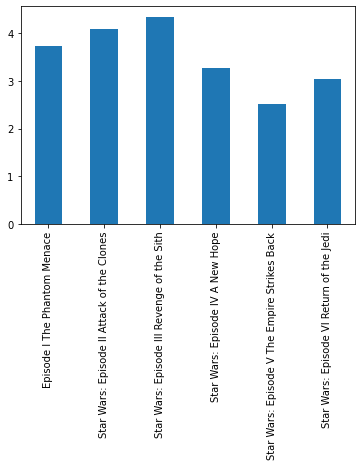

In [15]:

import matplotlib.pyplot as plt
%matplotlib inline
fig, ax= plt.subplots()
ax = star_wars[star_wars.columns[9:15]].mean().plot(kind = 'bar')
ax.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])


## 6. Finding the Most Viewed Movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()` or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

**Tasks**

1. Use the `df.sum()` method to compute the sum of each seen columns.
2. Make a bar chart of each ranking. You can use a matplotlib bar chart for this.
3. Write up your thoughts on why the results look the way they do in a markdown cell. Also discuss how the results correlate with the rankings.

In [52]:
# Your code goes here

moive_map = {
  'Star Wars: Episode I  The Phantom Menace': True,
  'Star Wars: Episode II  Attack of the Clones': True,
  'Star Wars: Episode III  Revenge of the Sith': True,
  'Star Wars: Episode IV  A New Hope': True,
  'Star Wars: Episode V The Empire Strikes Back': True,
  'Star Wars: Episode VI Return of the Jedi': True,
  True: True,
  False: False,
  np.NaN: False
}
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].apply(lambda col: col.map(moive_map) , axis = 0)
star_wars[star_wars.columns[3:9]].head()



,seen1,seen2,seen3,seen4,seen5,seen6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [53]:
star_wars[star_wars.columns[3:9]].sum()

seen1    673
seen2    571
seen3    550
seen4    607
seen5    758
seen6    738
dtype: int64

[Text(0, 0, 'Episode I The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

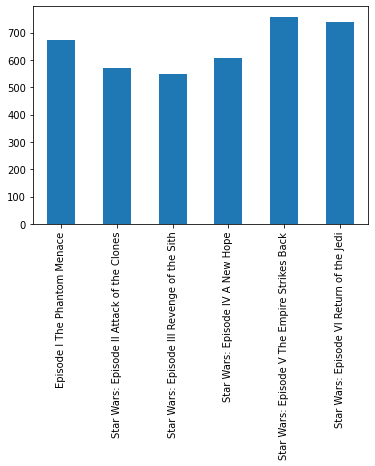

In [54]:
ax = star_wars[star_wars.columns[3:9]].sum().plot(kind='bar')
ax.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])

From the ranking above Star Wars: Episode V The Empire Strikes Back was ranked the best .

## 8. Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

* `Do you consider yourself to be a fan of the Star Wars film franchise?` — True or False
* `Do you consider yourself to be a fan of the Star Trek franchise?` — Yes or No
* `Gender` — Male or Female

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the Gender column like this:

```
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
```

The subsets allow us to compute the most viewed movie, the `highest-ranked` movie, and other statistics separately for each group.

**Tasks**
1. Split the data into two groups based on one of the binary columns above.

2. Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.

3. If you see any interesting patterns, write about them in a markdown cell.


In [56]:
# Your code goes here
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female" ]

#ranking genders
ranking_gender = pd.DataFrame({'males':males[males.columns[9:15]].mean(),
                              'females':females[females.columns[9:15]].mean()})
ranking_gender


,males,females
ranking_1,4.037825,3.429293
ranking_2,4.224586,3.954660
ranking_3,4.274882,4.418136
ranking_4,2.997636,3.544081
ranking_5,2.458629,2.569270
ranking_6,3.002364,3.078086


In [57]:
seen_gender = pd.DataFrame({'males':males[males.columns[3:9]].sum(),
                              'females':females[females.columns[3:9]].sum()})
seen_gender

,males,females
seen1,361,298
seen2,323,237
seen3,317,222
seen4,342,255
seen5,392,353
seen6,387,338


[Text(0, 0, 'Episode I The Phantom Menace'),
 Text(0, 0, 'Star Wars: Episode II Attack of the Clones'),
 Text(0, 0, 'Star Wars: Episode III Revenge of the Sith'),
 Text(0, 0, 'Star Wars: Episode IV A New Hope'),
 Text(0, 0, 'Star Wars: Episode V The Empire Strikes Back'),
 Text(0, 0, 'Star Wars: Episode VI Return of the Jedi')]

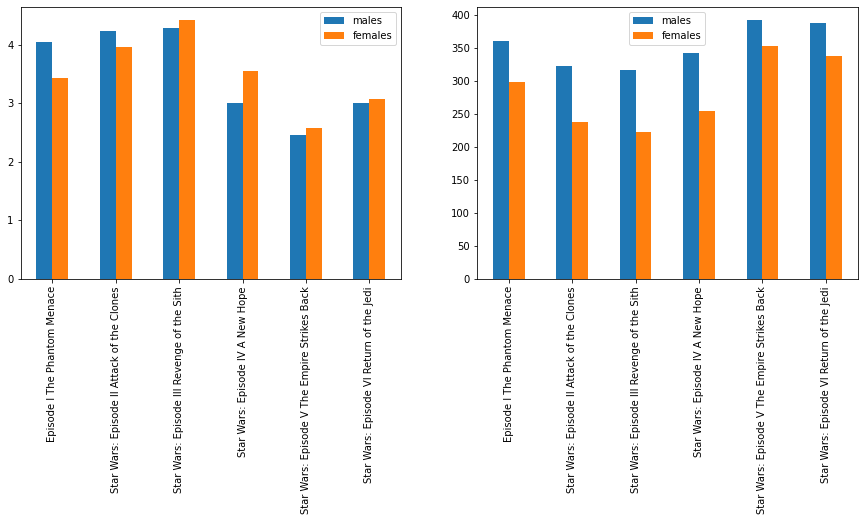

In [58]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1 = ranking_gender.plot(kind = 'bar' ,ax=ax1)
ax1.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])
ax2 = seen_gender.plot(kind = 'bar',ax=ax2)
ax2.set_xticklabels(['Episode I The Phantom Menace','Star Wars: Episode II Attack of the Clones','Star Wars: Episode III Revenge of the Sith','Star Wars: Episode IV A New Hope','Star Wars: Episode V The Empire Strikes Back',
                'Star Wars: Episode VI Return of the Jedi'])

## 9. Next Steps

That's it for the guided steps! We highly recommend exploring the data further on your own.

Here are some potential next steps:

* Try to segment the data based on columns like `Education`, `Location` (Census Region), and `Which character shot first?`, which aren't binary. Are there any interesting patterns?
* Clean columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
* Which character do respondents like the most?
* Which character do respondents dislike the most?
* Which character is the most controversial (split between likes and dislikes)?